# 10강 딥러닝 Chmical Data에 적용하기(github 불러오기와 RNN)
## 이번 강의에서 다룰 내용
* 외부 Github를 사용하기: Mol2vec 사용 실습
* RNN 개요: RNN을 사용하는 상황의 예시로 RNN 모델을 만드는 것까지 실습
* Chmical Data에 RNN 적용하기: Molecule Gerneration



##1. 외부 Github 사용하기(Mol2vec)

https://github.com/samoturk/mol2vec
해당 github에 공유되어 있는 Mol2vec 데이터 변환법을 모델 개발에 사용하려고 한다.
github를 가져오려고 할때 가장 중요한 것은 github 접속 시 가장 맨 처음 페이지인 README.md 파일을 읽어보는 것이다. 여기에 github 작성자가 제시하는 모든 지침이 들어 있다.

### Github 라이브러리 설치하기

In [ ]:
!pip install git+https://github.com/samoturk/mol2vec



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-2rkng3t6
  Running command git clone -q https://github.com/samoturk/mol2vec /tmp/pip-req-build-2rkng3t6
  Created wheel for mol2vec: filename=mol2vec-0.1-py3-none-any.whl size=14038 sha256=80e504a3675fc5e68c62a55271dca9f32f94292dd90430927679e1669942f3ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-_7mmn2bu/wheels/80/d5/e1/90dc211e4a17780f99eaec43328470a70284cd731ef2a77034
Successfully built mol2vec


### Dependency 라이브러리 설치하기

In [ ]:
!pip3 install gensim==3.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# 분자 데이터를 다루기 위해 rdkit 설치하기
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 31 kB/s 


### 데이터 준비하기

In [ ]:
!wget https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip
!ls
!unzip bbbp.zip

--2022-08-12 01:08:10--  https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/molnet_publish/bbbp.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.193.32
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.193.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46174 (45K) [application/zip]
Saving to: ‘bbbp.zip’

bbbp.zip            100%[===================>]  45.09K  --.-KB/s    in 0.1s    

2022-08-12 01:08:10 (330 KB/s) - ‘bbbp.zip’ saved [46174/46174]

bbbp.zip  sample_data
Archive:  bbbp.zip
  inflating: BBBP.csv                
  inflating: BBBP_README             


In [ ]:
import pandas as pd

data = pd.read_csv('BBBP.csv')

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np

In [ ]:
#데이터를 확인해보니 Molobject로 변환되지 않는 데이터가 있었음
idxs=[]
for i, smiles in enumerate(data["smiles"]):
    mol = Chem.MolFromSmiles(smiles)
    if (mol==None):
      idxs.append(i)
data=data.drop(idxs, axis=0)

In [ ]:
#fps = []
#for i, smiles in enumerate(data["smiles"]):
#    mol = Chem.MolFromSmiles(smiles)
#    arr = np.zeros((1,))
#    # rdkit의 fingerprint 함수를 사용해서 분자의 특성 수치화
#    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2048)
#    DataStructs.ConvertToNumpyArray(fp, arr)
#    
#    fps.append(arr)
    
#data["fp"] = fps
#data

In [ ]:
#word2vec모델을 사용하기 위해 gensim.models의 word2vec import
from gensim.models import word2vec
#mol2vec에 필요한 라이브러리와 함수들을 import
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec,featurize
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg

In [ ]:
aas = [Chem.MolFromSmiles(x) for x in data["smiles"]]

In [ ]:
data["smiles"][0]

'[Cl].CC(C)NCC(O)COc1cccc2ccccc12'

In [ ]:
#mol2alt_sentence를 사용하여 문장으로 변환 문장 변환에는 identifier들이 생성됨
sentence=mol2alt_sentence(aas[0],1)
len(sentence),sentence

(39,
 ['3855290507',
  '2246728737',
  '3537119515',
  '2245273601',
  '2635303940',
  '2246728737',
  '3537119515',
  '847961216',
  '1369588494',
  '2245384272',
  '781912670',
  '2245273601',
  '1674219510',
  '864662311',
  '1542633699',
  '2245384272',
  '4003049590',
  '864674487',
  '2115476908',
  '3217380708',
  '1135286194',
  '3218693969',
  '951226070',
  '3218693969',
  '98513984',
  '3218693969',
  '951226070',
  '3217380708',
  '2360741695',
  '3218693969',
  '951226070',
  '3218693969',
  '98513984',
  '3218693969',
  '98513984',
  '3218693969',
  '951226070',
  '3217380708',
  '3983062349'])

In [ ]:
it = IdentifierTable(sentence, [aas[0]]*len(sentence), [sentence]*len(sentence), 5, 1)
it

### word2vec(간단하게 짚고 넘어가기)
* Word Embedding: 단어를 표현하는데 one-hot encoding을 사용하지 않고 저차원 벡터 공간으로 표현을 바꾸는 방법을 말함
* 기본 가정: 유사한 분포를 가지는 단어는 유사한 의미를 가진다.(벡터 공간 상에서 거리가 가까움)
* 장점: 각각의 단어의 출현 빈도, 주변 관계 등 대한 의미정보를 반영하여 벡터에 투영하였기에 더 적은 공간으로도 더 의미있는 정보들을 표현할 수 있음
 또한, 아래 그림처럼 바로 원하는 임베딩 벡터 값을 출력해 볼 수 있어 사전에 많은 데이터로 학습하고 재활용하는데 많이 활용됨
![img](https://velog.velcdn.com/images%2Fgooook%2Fpost%2F07320f4e-5ad9-4619-92fe-320c4ba9d00d%2F68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f333031302f312a4f456d57447434657a744f636d3570723251627866412e706e67.png)

![img](https://velog.velcdn.com/images%2Fgmlwlswldbs%2Fpost%2F44ad12c0-91ac-4419-b822-316a12d01757%2F%EB%8B%A8%EC%96%B4.png)

![img](https://wikidocs.net/images/page/22660/word2vec_renew_2.PNG)

![img](https://wikidocs.net/images/page/22660/word2vec_renew_3.PNG)

### mol2vec 사용하기 위해 학습된 결과 가져오기

In [ ]:
#이미 대량의 Chemical Library(ZINCv15, ChEMBLv23)로 학습한 모델 결과 다운로드
!wget https://raw.githubusercontent.com/samoturk/mol2vec/master/examples/models/model_300dim.pkl

--2022-08-12 01:16:01--  https://raw.githubusercontent.com/samoturk/mol2vec/master/examples/models/model_300dim.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76786055 (73M) [application/octet-stream]
Saving to: ‘model_300dim.pkl’

model_300dim.pkl    100%[===================>]  73.23M   190MB/s    in 0.4s    

2022-08-12 01:16:07 (190 MB/s) - ‘model_300dim.pkl’ saved [76786055/76786055]



In [ ]:
#wor2vec model에 이미 학습되었던 가중치 값을 불러옴
w2vmodel = word2vec.Word2Vec.load('model_300dim.pkl')

In [ ]:
len(w2vmodel.wv.vocab.keys())

21003

In [ ]:
data.head(n=1)

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12


### w2v생성을 위한 3단계 변환 과정
* 1. data에 Mol object 만들어주기
* 2. Mol object를 sentence로 변환하기(MolSentence 객체로 반환)
* 3. sentence를 vec로 변환하기 (Dfvec 객체로 반환)

,smiles,Molecule
0,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,

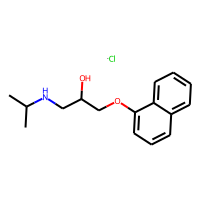

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
PandasTools.AddMoleculeColumnToFrame(data,'smiles','Molecule')
data[["smiles","Molecule"]].head(1)

In [ ]:
data['sentence'] = data.apply(lambda x: MolSentence(mol2alt_sentence(x['Molecule'], 1)), axis=1)

In [ ]:
data['mol2vec'] = [DfVec(x) for x in sentences2vec(data['sentence'], w2vmodel, unseen='UNK')]

In [ ]:
data['mol2vec']= [x.vec for x in data['mol2vec']]

,num,name,p_np,smiles,Molecule,sentence,mol2vec
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,,"(3855290507, 2246728737, 3537119515, 224527360...","[-0.32573423, -2.188017, -2.0390112, 5.854848,..."
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,,"(2246699815, 4194366826, 864942730, 1510328189...","[0.36889017, -1.9671557, -0.88539, -0.20521241..."
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,,"(3217380708, 3796970912, 3217380708, 369315086...","[5.26491, -5.150363, -4.037241, 4.560603, -2.0..."
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,,"(2968968094, 2142032900, 2968968094, 214203290...","[0.5659893, -4.693765, -0.76939243, 4.186935, ..."
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,,"(2246728737, 422715066, 3217380708, 3662562115...","[0.5433947, -5.267678, -2.3712387, 1.1504936, ..."
...,...,...,...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,,"(3218693969, 994485099, 3217380708, 2424973678...","[2.7910373, -1.611804, -3.819929, 4.2662992, -..."
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,,"(2976033787, 3109000344, 2092489639, 934550081...","[4.230009, -5.7500186, -6.662907, 4.150695, 1...."
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,,"(3189554341, 3772526016, 2041434490, 247958282...","[0.41964823, -2.1095579, -2.2520032, 6.2380543..."
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,,"(3218693969, 994485099, 3217380708, 1135286194...","[0.48838872, -2.5749228, -4.676146, 9.106438, ..."

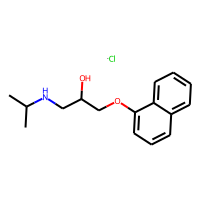
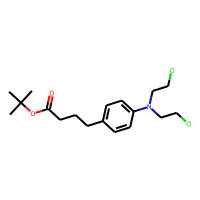
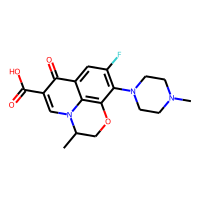
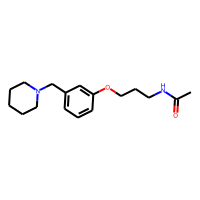
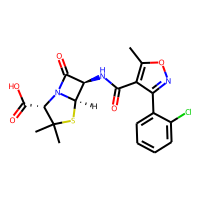
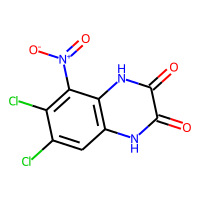
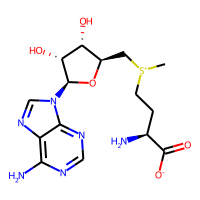
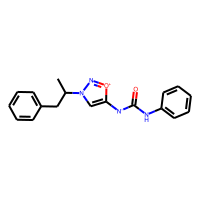
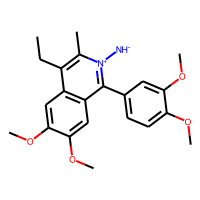
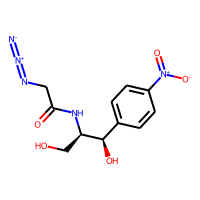

In [ ]:
data

###훈련 데이터, 테스트 데이터 분할하기

In [ ]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(data, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size=0.1/0.9, random_state=42)

datasets = {
    "train": train,
    "val":  val,
    "test": test
}

datasets

{'test':        num                      name  p_np  \
 1326  1330                  lisuride     1   
 1008  1010                   atolide     1   
 1078  1080  cetophenicol/cetofenicol     1   
 1791  1795               dextrorphan     1   
 796    798         cefuroxime-axetil     0   
 ...    ...                       ...   ...   
 308    310                methyldopa     0   
 369    371            Streptozotocin     0   
 766    768                  cefdinir     0   
 1294  1298  hydrocortisone-aceponate     1   
 1262  1266                flutroline     1   
 
                                                  smiles  \
 1326  [C@@H]14C(=C[C@H](NC(N(CC)CC)=O)CN1C)C2=CC=CC3...   
 1008        C1=CC=CC(=C1C(NC2=C(C=C(N(CC)CC)C=C2)C)=O)N   
 1078        C1=C(C(O)C(CO)NC(C(Cl)Cl)=O)C=CC(=C1)C(=O)C   
 1791  [C@]134[C@@H]([C@H](CC2=C1C=C(O)C=C2)N(C)CC3)C...   
 796   CO/N=C(C(=O)N[C@H]1[C@H]2SCC(=C(N2C1=O)C(=O)OC...   
 ...                                                 ...   
 308  

### 커스텀 데이터세트 만들기

In [ ]:
from torch.utils.data import Dataset

class bbbpDataset(Dataset):
    
    def __init__(self, df):
        self.x = list(df["mol2vec"])
        self.y = list(df["p_np"].values)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return torch.tensor(self.x[index]).float(),  torch.tensor(self.y[index]).float()
    
bbbpdata = {
    "train": bbbpDataset(datasets["train"]),
    "val": bbbpDataset(datasets["val"]),
    "test": bbbpDataset(datasets["test"]),
}

bbbpdata

{'test': <__main__.bbbpDataset at 0x7f0a3106c3d0>,
 'train': <__main__.bbbpDataset at 0x7f0a9e3ad710>,
 'val': <__main__.bbbpDataset at 0x7f0a9f9c31d0>}

In [ ]:
import torch
from torch.utils.data import DataLoader

bbbp_dataloaders = {
    "train": DataLoader(bbbpdata["train"], batch_size=32, shuffle=True),
    "val": DataLoader(bbbpdata["val"], batch_size=32, shuffle=False),
    "test": DataLoader(bbbpdata["test"], batch_size=32, shuffle=False)
}

bbbp_dataloaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f0a9e3ad310>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f0a2a7b24d0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7f0a2a79f290>}

In [ ]:
for data in bbbp_dataloaders["train"]:
    x, y = data
    print(x.shape, y.shape)

torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) torch.Size([32])
torch.Size([32, 300]) tor

### 모델 만들기

In [ ]:
import torch
from torch import nn

# cpu나 gpu에서 모두 동작하게 만들기
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class bbbp_MLP(nn.Module):
    def __init__(self):
        super(bbbp_MLP, self).__init__()
        self.linear1 = nn.Linear(300, 512) # 완전 연결된 단순 레이어 만들기 
        self.linear2 = nn.Linear(512, 256)
        self.output = nn.Linear(256, 1) # 최종 예측을 위해 출력 부 크기 1로 설정 
        self.dropout1 = nn.Dropout(0.5) #일반화를 위한 Dropout
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.dropout1(out)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.output(out)
        return out

model = bbbp_MLP()
model.to(device)

bbbp_MLP(
  (linear1): Linear(in_features=300, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=1, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)

### 손실 및 최적화 함수 설정

In [ ]:
import torch.optim as optim

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss는 sigmoid를 내장하고 있음
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

# 모델 평가를 위한 지표를 만들어 봅시다.

def acc_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() 두개의 텐서가 같은지 평가해줌
    acc = (correct / len(y_pred)) * 100 
    return acc

### 모델 학습하기

In [ ]:
torch.manual_seed(42)

# 전체 학습 데이터로 몇번 학습 시킬 것이냐를 결정
epochs = 101 #반복횟수 늘리기

# 손실 값을 저장하기 위한 변수 정의
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0

    for i, data in enumerate(bbbp_dataloaders["train"]):
        x, y = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = model(x)
        train_loss = loss_fn(outputs, y.view(-1, 1))
        train_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
        train_loss.backward()
        optimizer.step()
        
        epoch_train_loss += train_loss.item()
        
    model.eval()
    epoch_val_loss = 0.0
    with torch.inference_mode():
        for i, data in enumerate(bbbp_dataloaders["test"]):
            x, y = data[0].to(device), data[1].to(device)
                        
            outputs = model(x)
            val_loss = loss_fn(outputs, y.view(-1, 1))
            val_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
            epoch_val_loss += val_loss.item()
            
    epoch_train_loss /= len(bbbp_dataloaders["train"])
    epoch_val_loss /= len(bbbp_dataloaders["test"])
    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    if epoch % 10 == 0:
        print("[Epoch %d] Train Loss: %.3f  Train acc : %.3f Validation Loss: %.3f Validation acc : %.3f" %
              (epoch, epoch_train_loss, train_acc, epoch_val_loss, val_acc))

[Epoch 0] Train Loss: 0.631  Train acc : 64.516 Validation Loss: 0.619 Validation acc : 58.333
[Epoch 10] Train Loss: 0.457  Train acc : 93.548 Validation Loss: 0.448 Validation acc : 100.000
[Epoch 20] Train Loss: 0.427  Train acc : 77.419 Validation Loss: 0.416 Validation acc : 100.000
[Epoch 30] Train Loss: 0.399  Train acc : 74.194 Validation Loss: 0.402 Validation acc : 100.000
[Epoch 40] Train Loss: 0.383  Train acc : 90.323 Validation Loss: 0.395 Validation acc : 100.000
[Epoch 50] Train Loss: 0.380  Train acc : 96.774 Validation Loss: 0.392 Validation acc : 100.000
[Epoch 60] Train Loss: 0.372  Train acc : 87.097 Validation Loss: 0.386 Validation acc : 100.000
[Epoch 70] Train Loss: 0.362  Train acc : 77.419 Validation Loss: 0.386 Validation acc : 100.000
[Epoch 80] Train Loss: 0.351  Train acc : 90.323 Validation Loss: 0.381 Validation acc : 100.000
[Epoch 90] Train Loss: 0.343  Train acc : 100.000 Validation Loss: 0.380 Validation acc : 91.667
[Epoch 100] Train Loss: 0.341  T

### 결과 리포팅 하기

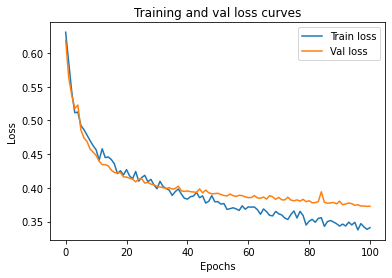

In [ ]:
import matplotlib.pyplot as plt

epoch_count = range(epochs)
plt.plot(epoch_count, train_losses, label="Train loss")
plt.plot(epoch_count, val_losses, label="Val loss")
plt.title("Training and val loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

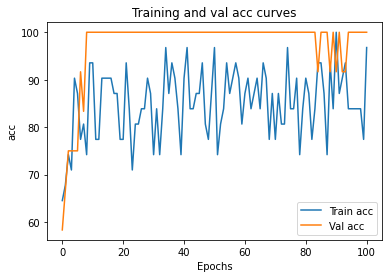

In [ ]:
epoch_count = range(epochs)
plt.plot(epoch_count, train_accs, label="Train acc")
plt.plot(epoch_count, val_accs, label="Val acc")
plt.title("Training and val acc curves")
plt.ylabel("acc")
plt.xlabel("Epochs")
plt.legend();

##2. RNN 개요
우리가 이론 시간에 RNN에 대해서 간단하게 배웠다. RNN은 어떤 상황에서 사용할 수 있을지 소개하고, 파이토치로 어떻게 구현되는지 알아보겠다.

### 데이터 준비하기

In [ ]:
text = ['hey how are you','good i am fine','have a nice day']

#unique한 character만 뽑아오기 위한 집합 사용
chars = set(''.join(text))

#chars를 하나의 숫자로 매핑하기 위한 사전 사용
int2char = dict(enumerate(chars))
#학습된 모델에서 생성되는 숫자들을 다시 char로 변환해주기위한 사전
char2int = {char: ind for ind, char in int2char.items()}
chars, int2char,char2int

({' ',
  'a',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'm',
  'n',
  'o',
  'r',
  'u',
  'v',
  'w',
  'y'},
 {0: 'y',
  1: 'h',
  2: 'r',
  3: 'w',
  4: 'v',
  5: 'o',
  6: 'f',
  7: 'g',
  8: 'a',
  9: 'n',
  10: 'u',
  11: 'm',
  12: ' ',
  13: 'i',
  14: 'd',
  15: 'e',
  16: 'c'},
 {' ': 12,
  'a': 8,
  'c': 16,
  'd': 14,
  'e': 15,
  'f': 6,
  'g': 7,
  'h': 1,
  'i': 13,
  'm': 11,
  'n': 9,
  'o': 5,
  'r': 2,
  'u': 10,
  'v': 4,
  'w': 3,
  'y': 0})

In [ ]:
maxlen = len(max(text, key=len))
print("가장 긴 문장 길이",maxlen)

가장 긴 문장 길이 15


In [ ]:
#가장 긴 길이에 맞게 ' '빈 패딩 추가
for i in range(len(text)):
    while len(text[i])<maxlen:
        text[i] += ' '
for t in text: print(t, len(t))

hey how are you 15
good i am fine  15
have a nice day 15


In [ ]:
# 그대로 예측을 하지말도록 문장에서 character 한개씩 밀어줌
input_seq = []
target_seq = []

for i in range(len(text)):
    # Remove last character for input sequence
    input_seq.append(text[i][:-1])
    
    # Remove firsts character for target sequence
    target_seq.append(text[i][1:])
    print("입력: {}\n출력: {}".format(input_seq[i], target_seq[i]))

입력: hey how are yo
출력: ey how are you
입력: good i am fine
출력: ood i am fine 
입력: have a nice da
출력: ave a nice day


In [ ]:
# 시퀀스 숫자로 변환하기
for i in range(len(text)):
    input_seq[i] = [char2int[character] for character in input_seq[i]]
    target_seq[i] = [char2int[character] for character in target_seq[i]]

In [ ]:
dict_size = len(char2int) #17
seq_len = maxlen-1 #14
batch_size = len(text) #3

def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    # 배치크기,시퀀스 길이, character 사전 모양의 입력 데이터 생성하기
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    # 사전에 있는 character의 index에 맞으면 1로 표시
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

In [ ]:
input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)
print("Input shape:",input_seq.shape)

Input shape: (3, 14, 17)


In [ ]:
input_seq = torch.from_numpy(input_seq)
target_seq = torch.Tensor(target_seq)

In [ ]:
target_seq

tensor([[15.,  0., 12.,  1.,  5.,  3., 12.,  8.,  2., 15., 12.,  0.,  5., 10.],
        [ 5.,  5., 14., 12., 13., 12.,  8., 11., 12.,  6., 13.,  9., 15., 12.],
        [ 8.,  4., 15., 12.,  8., 12.,  9., 13., 16., 15., 12., 14.,  8.,  0.]])

### 모델 만들기

In [ ]:
import torch
from torch import nn

# cpu나 gpu에서 모두 동작하게 만들기
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        # 히든 차원과 레이어 수 입력으로 받기 위한 변수 정의
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # RNN 레이어
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # 최종 출력을 위한 fc레이어
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        # 히든 값을 초기화함 아래의 초기화 함수로 자동 초기화
        hidden = self.init_hidden(batch_size)
        # 입력 데이터 x와 hidden을 사용해서 출력과 hidden을 갱신
        out, hidden = self.rnn(x, hidden)
        
        # 예측 생성을 위한 fc 입력 모양 hidden dim과 모양을 맞춰줌
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # hidden state 초기화
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(device)
        return hidden
      
model = RNN(input_size=dict_size, output_size=dict_size, hidden_dim=12, n_layers=1)
model = model.to(device)

### 손실 및 최적화 함수 설정

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### 모델 학습하기

In [ ]:
epochs = 100 #반복횟수 늘리기

for epoch in range(1, epochs + 1):
    optimizer.zero_grad() 
    input_seq = input_seq.to(device)
    output, hidden = model(input_seq)
    output = output.to(device)
    target_seq = target_seq.to(device)
    loss = loss_fn(output, target_seq.view(-1).long())
    loss.backward()
    optimizer.step()
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100............. Loss: 2.4796
Epoch: 20/100............. Loss: 2.1500
Epoch: 30/100............. Loss: 1.7752
Epoch: 40/100............. Loss: 1.3705
Epoch: 50/100............. Loss: 1.0105
Epoch: 60/100............. Loss: 0.7364
Epoch: 70/100............. Loss: 0.5323
Epoch: 80/100............. Loss: 0.3811
Epoch: 90/100............. Loss: 0.2748
Epoch: 100/100............. Loss: 0.2047


In [ ]:
def predict(model, character):
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)
    character = character.to(device)
    
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    char_ind = torch.max(prob, dim=0)[1].item()

    return int2char[char_ind], hidden

In [ ]:
def sample(model, out_len, start='hey'):
    model.eval()
    start = start.lower()
    chars = [ch for ch in start]
    size = out_len - len(chars)
    for ii in range(size):
        char, h = predict(model, chars)
        chars.append(char)

    return ''.join(chars)

In [ ]:
sample(model, 15, 'good')

'good i am fine '

##3. Chmical Data에 RNN 적용하기

In [ ]:
# 라이브러리 import
import numpy as np  # 다차원 배열을 쉽게 처리하는 numpy 라이브러리
import torch        # 오픈소스 머신 러닝 라이브러리 pytorch
from torch import nn  # pytorch 내의 모델 정의용 라이브러리
import torch.nn.functional as F   # pytorch 내의 모델 학습 시 사용되는 함수들이 모여있는 라이브러리
import pandas as pd   # 데이터 조작 및 분석을 위한 라이브러리

### 데이터 준비하기
데이터는 kiba 데이터 세트에서 SMILES만을 따로 가져와서 rnn_train이라는 데이터세트를 만들었다.
아래의 링크를 누르면 바로 다운로드 될 것이다. 다운로드 받고 colab의 파일 부분에 드래그앤 드랍으로 파일을 올려놓으면 colab에 업로드된다.
https://docs.google.com/spreadsheets/d/11ysZOYoZXdwoGJ6BKhz8eK47jb1AGLTPj9HFiyAskBQ/export?format=csv


In [ ]:
data=pd.read_csv("rnn_train.csv")   # sample_data 폴더 내의 rnn_train.csv 파일을 DataFrame 타입으로 불러오기
data.to_csv('rnn_train.txt',sep='\n')   # 윗 줄에서 불러온 파일을 구분자를 '\n'(줄 바꿈)으로 변경하여 rnn_train.txt 파일로 저장
with open('rnn_train.txt', 'r') as f:   # rnn_train.txt 파일 불러오기
    text = f.read()

In [ ]:
data

,Cc1cccc(NC(=O)Nc2ccc(-c3csc4c(C#CCCCCCCCCN)cnc(N)c34)cc2)c1
0,O=c1c(NCc2ccc(Cl)cc2Cl)c(Nc2ccc3[nH]ncc3c2)c1=O
1,CC(=O)Nc1cc(N)c(C#N)c(-c2ccsc2)n1
2,N#Cc1ncc2nc1OCCCCOc1cc(NCc3cncs3)c(Cl)cc1NC(=O)N2
3,N#CC1=C(c2c(-c3cc4ccccc4s3)n(CCCSC(=N)N)c3cccc...
4,CC(C)c1nnc2ccc(-c3ocnc3-c3ccccc3)cn12
...,...
435071,Cc1ccc(F)c(-c2ccc3nnc(N)n3c2)c1
435072,COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN(C)C1(C(N)=O...
435073,Cc1ccc2c(c1)NC(=O)c1ccccc1N2
435074,O=C1OCC2OC(=O)c3cc(O)c(O)c(O)c3-c3c(O)c(O)c(O)...


In [77]:
text

In [78]:
# text 내의 데이터 종류를 보기위해 집합(set)으로 타입 변경 (set 타입은 데이터 중복을 없애줌)
sets=set(text)
chars = tuple(sets)
# chars 내의 데이터로 key 는 인덱스로, value 는 기존 데이터로 갖는 dicktionary를 int2char에 저장
# 나중에 모델 출력 시 숫자로 나오는데 이것을 다시 Char로 변환하기 위함
int2char = dict(enumerate(chars))
# char2int에 int2char의 key 와 value를 반전하여 저장(모델 입력에 활용 숫자 변환)
char2int = {ch: ii for ii, ch in int2char.items()}
# text의 데이터를 char2int에 key로 삽입하여 각 문자에 대응하는 숫자로 변경한다.
encoded = np.array([char2int[ch] for ch in text if ch!='\n' ])

In [79]:
encoded.shape

(24161461,)

In [80]:
print(char2int)
print(int2char)
print(text[:20])
print(encoded[:20])

{'[': 0, '6': 1, 'N': 2, '#': 3, 'C': 4, '2': 5, 'S': 6, 'c': 7, 'o': 8, 'O': 9, ')': 10, '(': 11, 'B': 12, '+': 13, '-': 14, 's': 15, 'H': 16, '.': 17, '\n': 18, '1': 19, '=': 20, 'P': 21, '4': 22, '5': 23, '0': 24, ']': 25, 'r': 26, 'F': 27, '9': 28, 'l': 29, 'n': 30, '7': 31, 'I': 32, '3': 33, '8': 34}
{0: '[', 1: '6', 2: 'N', 3: '#', 4: 'C', 5: '2', 6: 'S', 7: 'c', 8: 'o', 9: 'O', 10: ')', 11: '(', 12: 'B', 13: '+', 14: '-', 15: 's', 16: 'H', 17: '.', 18: '\n', 19: '1', 20: '=', 21: 'P', 22: '4', 23: '5', 24: '0', 25: ']', 26: 'r', 27: 'F', 28: '9', 29: 'l', 30: 'n', 31: '7', 32: 'I', 33: '3', 34: '8'}

Cc1cccc(NC(=O)Nc2cc
[ 4  7 19  7  7  7  7 11  2  4 11 20  9 10  2  7  5  7  7  7]


In [81]:
# 원-핫 인코딩 함수 정의
#set에서 unique한 문자가 총 35개를 얻었으므로 해당되는 문자의 값만 1로 변환하기 위해 아래와 같은 여러 변환 방법을 사용함 
# 간단 예시  a, b, c, d  고유 문자 4개 있을때  5 크기의 문장이 있다고 하면  "baccd" 
#[[0 1 0 0],
# [1 0 0 0],
# [0 0 1 0],
# [0 0 1 0],
# [0 0 0 1]]
# 이 문장 크기를 1600으로 늘렸다고 생각하면 됨

def one_hot_encode(arr, n_labels):   
    one_hot = np.zeros((np.multiply(*arr.shape), n_labels), dtype=np.float32)#(1600,35) 초기화
    one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1.
    one_hot = one_hot.reshape((*arr.shape, n_labels))
    return one_hot

In [82]:
# 데이터를 배치 사이즈에 맞게 묶어주는 함수 정의
def get_batches(arr, batch_size, seq_length): # 기본값 batch_size = 32, seq_length = 50
    # 배치 1 묶음의 길이 = 배치사이즈 * 시퀀스 길이
    batch_size_total = batch_size * seq_length
    # 배치 묶음의 갯수 지정 (전체 데이터 길이 / 배치 1 묶음의 길이)
    n_batches = len(arr)//batch_size_total
    
    # 배치 사이즈로 묶을 수 있는 크기만 남기고 나머지는 제외
    arr = arr[:n_batches * batch_size_total]
    # 배치 사이즈에 맞게 재구조화
    arr = arr.reshape((batch_size, -1)) # (32,755000)
    
    # 시퀀스 길이 단위로 n을 증가시키며 반복분 수행
    for n in range(0, arr.shape[1], seq_length): #0~755000 50단위로 짜르기 위함
        # 시퀀스 길이에 맞게 슬라이싱 (x.shape -> (32, 50))
        x = arr[:, n:n+seq_length]
        # x 와 같은 구조의 배열을 0으로 채워서 y 에 저장
        y = np.zeros_like(x)
        # x를 한칸씩 이동시켜 y에 저장
        try:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+seq_length]
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
        yield x, y

# GPU 사용이 가능한지 확인
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

Training on GPU!


In [83]:
batch_size = 32
seq_length = 50
batch_size_total = batch_size * seq_length #1600
print(batch_size_total)
n_batches = len(encoded)//batch_size_total
print(n_batches)

1600
15100


In [84]:
arr = encoded[:n_batches * batch_size_total]
len(arr), arr.shape

(24160000, (24160000,))

In [85]:
arr = arr.reshape((batch_size, -1))
len(arr), arr.shape

(32, (32, 755000))

In [86]:
#x와 y의 값이 동일한데 1개 이후의 시퀀스를 예측하도록 1 shift해서 y를 만듬
for n in range(0, arr.shape[1], seq_length):
        # The features
        x = arr[:, n:n+seq_length]
        # 한칸씩 이동 시킴
        y = np.zeros_like(x)
        try:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+seq_length]
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
print(x[1])
print(len(x[1]))
print(y[1])
print(len(y[1]))
print(x.shape, y.shape)

[30 16 25  7 33 22 10  7  5 10 30 11 14  7  5  7  7  7  7  7  5 10 30 19
  5 31 31 28 23  4  7 19  7  7  7  7 11  2  4 11 20  9 10  2  7  5  7  7
  7 11]
50
[16 25  7 33 22 10  7  5 10 30 11 14  7  5  7  7  7  7  7  5 10 30 19  5
 31 31 28 23  4  7 19  7  7  7  7 11  2  4 11 20  9 10  2  7  5  7  7  7
 11  5]
50
(32, 50) (32, 50)


### 모델 만들기

In [87]:
class RNN(nn.Module):
    def __init__(self, tokens, n_hidden=10, n_layers=2,
                               drop_prob=0.2, lr=0.001):
        super().__init__()
        self.drop_prob = drop_prob
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.lr = lr

        self.chars = tokens
        self.int2char = dict(enumerate(self.chars))
        self.char2int = {ch: ii for ii, ch in self.int2char.items()}

        # LSTM (Long Short-Term Memory) 선언
        self.lstm = nn.LSTM(len(self.chars), n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(n_hidden, len(self.chars))

    def forward(self, x, hidden):
        r_output, hidden = self.lstm(x, hidden)
        out = self.dropout(r_output)
        out = out.contiguous().view(-1, self.n_hidden)
        out = self.fc(out)
        return out, hidden


    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        weight = next(self.parameters()).data

        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_(),
                      weight.new(self.n_layers, batch_size, self.n_hidden).zero_())

        return hidden

### 모델 학습 코드 만들기

In [88]:
def train(model, data, epochs=3, batch_size=32, seq_length=50, lr=0.001, clip=5, val_frac=0.1,print_step=1000):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # 손실함수로는 크로스엔트로피 사용
    loss_fn = nn.CrossEntropyLoss()

    # 훈련 데이터와 검즘 데이터 분할
    val_idx = int(len(data)*(1-val_frac))
    data, val_data = data[:val_idx], data[val_idx:]

    # GPU 사용 가능 시 net을 GPU 메모리로 이동
    if(train_on_gpu):
        model.cuda()

    # 배치 학습 수행 횟수 체크하기 위한 변수
    steps = 0
    n_chars = len(model.chars)#35
    for epoch in range(epochs):
        # hidden 레이어를 barch_size에 맞게 초기화
        h = model.init_hidden(batch_size)
        # data를 batch_size에 맞게 분할 후 하나씩 반복
        for x, y in get_batches(data, batch_size, seq_length):
            steps += 1 
            # batch_size에 맞게 나눠진 x를 one-hot 인코딩 수행
            x = one_hot_encode(x, n_chars)
            # one-hot 인코딩 된 x 를 inputs에, 텍스트 데이터인 y를 targets에 저장
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            # GPU 사용 가능 시 inputs과 targets을 GPU 메모리로 이동
            if(train_on_gpu):
                inputs, targets = inputs.cuda(), targets.cuda()

            h = tuple([each.data for each in h])
            model.zero_grad()
            output, h = model(inputs, h)
            loss = loss_fn(output, targets.view(batch_size*seq_length).long())
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), clip)
            optimizer.step()


            if steps % print_step == 0:
                val_h = model.init_hidden(batch_size)
                val_losses = []
                model.eval()
                for x, y in get_batches(val_data, batch_size, seq_length):
                    # batch_size에 맞게 나눠진 x를 one-hot 인코딩 수행
                    x = one_hot_encode(x, n_chars)
                    # one-hot 인코딩 된 x 를 inputs에, 텍스트 데이터인 y를 targets에 저장
                    x, y = torch.from_numpy(x), torch.from_numpy(y)
                    val_h = tuple([each.data for each in val_h])

                    inputs, targets = x, y
                    # GPU 사용 가능 시 inputs과 targets을 GPU 메모리로 이동
                    if(train_on_gpu):
                        inputs, targets = inputs.cuda(), targets.cuda()
                 
                    # model에 삽입하여 순전파 진행 (결과는 output과 val_h에 저장)
                    output, val_h = model(inputs, val_h)
                    val_loss = loss_fn(output, targets.view(batch_size*seq_length).long())
                    val_losses.append(val_loss.item())

                model.train()
                # 각각 Epoch, step, loss(train loss), Val Loss(val_loeese 리스트의 평균) 를 출력 
                print("Epoch: {}/{}...".format(epoch+1, epochs),
                      "Step: {}...".format(steps),
                      "Loss: {:.4f}...".format(loss.item()),
                      "Val Loss: {:.4f}".format(np.mean(val_losses)))

### 모델 학습하기

In [ ]:
# n_hidden, n_layer를 각각 56, 2 로 저장
n_hidden=56
n_layers=2 
model = RNN(chars, n_hidden, n_layers)
print(model) 
# 하이퍼파라미터 (batch_size, seq_length, n_epochs) 저장
batch_size = 32
seq_length = 50
epochs = 3
# 학습 시작
train(model, encoded, epochs=epochs, batch_size=batch_size, seq_length=seq_length, lr=0.001,print_step=100)

RNN(
  (lstm): LSTM(35, 56, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=56, out_features=35, bias=True)
)


TypeError: ignored

In [ ]:
# 모델 이름 변수
model_name = 'rnn_1_epoch.net'


# n_hidden, n_layer, state_dict, tokens를 딕셔너리 형태로 저장
checkpoint = {'n_hidden': model.n_hidden,
              'n_layers': model.n_layers,
              'state_dict': model.state_dict(),# 학습된 모델의 가중치
              'tokens': model.chars}

# 모델을 현재 폴더에 저장
with open(model_name, 'wb') as f:
    torch.save(checkpoint, f)


# 다음 문자 예측 방법 정의
def predict(model, char, h=None, top_k=None):

        # 입력된 문자를 해당 문자에 맞는 숫자로 저장하고(encoding) 이를 numpy array로 저장
        x = np.array([[model.char2int[char]]])
        # x 를 one-hot 인코딩 진행
        x = one_hot_encode(x, len(model.chars))
        # numpy array를 텐서로 변하여 input에 저장
        inputs = torch.from_numpy(x)

        if(train_on_gpu):
            inputs = inputs.cuda()

        h = tuple([each.data for each in h])
        out, h = model(inputs, h)

        # softmax함수를 이용하여 각 문자열일 확률 계산
        p = F.softmax(out, dim=1).data
        # 만약 p가 GPU 메모리에 있다면 메인메모리로 이동
        if(train_on_gpu):
            p = p.cpu() 

        if top_k is None:
            top_ch = np.arange(len(model.chars))
        else:
            p, top_ch = p.topk(top_k)
            top_ch = top_ch.numpy().squeeze()

        p = p.numpy().squeeze()
        char = np.random.choice(top_ch, p=p/p.sum())

        return model.int2char[char], h


In [ ]:
# 문자열 예측을 위한 함수 정의
def sample(model, size, prime='The', top_k=None):
    if(train_on_gpu):
        model.cuda()
    else:
        model.cpu()
    model.eval() 
    chars = [ch for ch in prime]
    h = model.init_hidden(1)
    for ch in prime:
        char, h = predict(model, ch, h, top_k=top_k)
    chars.append(char)
    for ii in range(size):
        char, h = predict(model, chars[-1], h, top_k=top_k)
        chars.append(char)
    return ''.join(chars)

In [ ]:
print(sample(model, 15, prime='N', top_k=5))

N=C(C)NC2)C(=N)N1


In [ ]:
print(sample(model, 15, prime='C', top_k=5))

C(N)C(=O)NC(C)CC3


In [ ]:

print(sample(model, 50, prime='C', top_k=5))

Cl)c2c1CC(C1CCCN1C(=O)N1C13361NC(=O)c1[nH]c2cc(Nc3[n
